# EDA
#### 탐색적 데이터 분석
#### Exploratory Data Analysis

문제를 풀 때 모델을 만들고 훈련 후에 성능을 평가하고, 생각보다 성능이 안나온다면 모델에 문제가 있다고 판단하고 다른 모델을 사용한다. 이처럼 모델에 문제가 있는 경우도 있지만 우선적으로 해당 문제를 잘 해결하기 위해서는 데이터 이해가 선행되어야 한다. 이러한 과정을 탐색적 데이터 분석, EDA라고 말한다.

문제를 해결하기 위한 모델에 문제가 없더라도 데이터마다 적합한 모델이 있는데 해당 모델과 데이터가 잘 맞지 않으면 좋은 결과를 얻을 수 없다. 즉, 아무리 좋은 모델이더라도 데이터와 궁합이 맞지 않은 모델이라면 여러 가지 문제에 직면하게 될 것이다.

탐색적 데이터 분석 과정은 정해진 틀 없이 데이터에 대해 최대한 많은 정보를 뽑아내면 된다. 데이터에 대한 정보란 데이터의 평균값, 중앙값, 최솟값, 최댓값, 범위, 분포, 이상치(Outlier) 등이 있다. 이러한 값들을 확인하고 히스토그램, 그래프 등의 다양한 방법으로 시각화하면서 데이터에 대한 직관을 얻어야 한다.

## 예제 데이터

##### 데이터 이름 : acllmd_v1
##### 데이터 용도 : 탐색적 데이터 분석에 대해 알아보기 위한 목적이다.
##### 데이터 권한 : MIT
##### 데이터 출처 : http://ai.stanford.edu/~amaas/data/sentiment

## 라이브러리 호출

In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

## 데이터 판다스로 변환

In [2]:
# 데이터를 가져올 디렉터리를 인자로 받는다.
# 디렉터리 안에 있는 파일들을 하나씩 가져와 그 안의 내용을 읽어서 data["sentence"] 배열에 하나씩 넣는다.
# 그리고 나서, 딕셔너리를 판다스 데이터프레임으로 만들어서 변환한다.

def directory_data(directory) : 
    data = {}
    data["review"] = []
    for file_path in os.listdir(directory) : 
        with open(os.path.join(directory, file_path), "r", encoding="utf-8") as file : 
            data["review"].append(file.read())
    return pd.DataFrame.from_dict(data)

In [3]:
# 폴더 이름을 지정하면 앞에서 만든 directory_data 함수를 호출하는데 이때 pos 폴더와 neg 폴더에 각각 접근한다.
# 긍정은 1, 부정은 0 으로 라벨링을 한다.

def data(directory) : 
    pos_df = directory_data(os.path.join(directory, "pos"))
    neg_df = directory_data(os.path.join(directory, "neg"))
    pos_df["sentiment"] = 1
    neg_df["sentiment"] = 0
    return pd.concat([pos_df, neg_df])

In [4]:
# 앞에서 만든 2개의 함수로 판다스 데이터프레임을 반환한다.
train_df = data("C:/Users/user/Desktop/NLP/02. NLP_with_Tensorflow/data/aclImdb/train")
test_df = data("C:/Users/user/Desktop/NLP/02. NLP_with_Tensorflow/data/aclImdb/test")

## Train 데이터

In [5]:
train_df.head()

,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


## Test 데이터

In [6]:
test_df.head()

,review,sentiment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


## DataFrame으로 부터 Review 문장 List 가져오기

In [7]:
reviews = list(train_df["review"])

 문장 토크나이징

In [8]:
# 문장열 문장 리스트를 토크나이징
tokenized_reviews = [r.split() for r in reviews]

# 토크나이징된 리스트에 대한 각 길이를 저장
review_len_by_token = [len(t) for t in tokenized_reviews]

# 토크나이징된 것을 붙여서 음절의 길이를 저장
review_len_by_eumjeol = [len(s.replace(' ','')) for s in reviews]

위와 같이 만드는 이유는 문장에포함된 단어와 알파벳의 개수에 대해 데이터 분석을 수월하게 만들기 위해서다.

## 문장을 구성하는 단어의 개수와 알파벳 개수의 히스토그램

In [9]:
import matplotlib.pyplot as plt

# 그래프에 대한 이미지 크기 선언
# figsize : (가로,세로) 형태의 튜플로 입력
plt.figure(figsize = (16,8))

# 히스토그램 선언
# bins : 히스토그램 값에 대한 버킷 범위
# alpha : 그래프 색상 투명도
# color : 그래프 색상
# label : 그래프에 대한 라벨
plt.hist(review_len_by_eumjeol, bins = 50, alpha = 0.5, color = "b", label="alphabet")
plt.hist(review_len_by_token, bins = 50, alpha = 0.5, color = "r", label="word")

# y축 스케일
plt.yscale("log", nonposy="clip")

# 그래프 제목
plt.title("Reviews Length Histogram")

# 그래프 x축 라벨
plt.xlabel("Reviews Length")

# 그래프 y축 라벨
plt.ylabel("Number of Reviews")

# 그래프 출력
plt.show()

<Figure size 1600x800 with 1 Axes>

빨간색은 단어의 개수에 대한 히스토 그램이고, 파란색은 알파벳 개수에 대한 히스토그램이다.

## 데이터 수치화

In [10]:
import numpy as np

print("문장 최대 길이 : {}" .format(np.max(review_len_by_token)))
print("문장 최소 길이 : {}" .format(np.min(review_len_by_token)))
print("문장 평균 길이 : {:.2f}" .format(np.mean(review_len_by_token)))
print("문장 길이 표준편차 : {:.2f}" .format(np.std(review_len_by_token)))

# 4분위수 : 0~100 스케일로 되어 있음
print("제 1사분위 길이 : {}" .format(np.percentile(review_len_by_token, 25)))
print("제 3사분위 길이 : {}" .format(np.percentile(review_len_by_token, 75)))

문장 최대 길이 : 2470
문장 최소 길이 : 10
문장 평균 길이 : 233.79
문장 길이 표준편차 : 173.73
제 1사분위 길이 : 127.0
제 3사분위 길이 : 284.0


## 데이터 수치 시각화 (Boxplot)

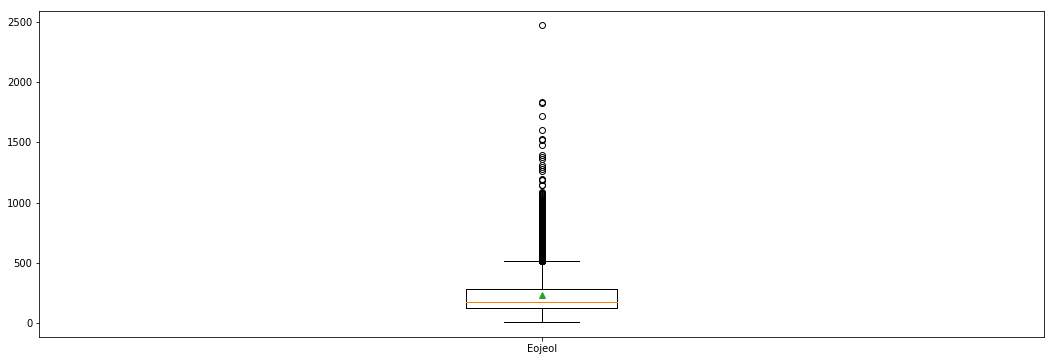

In [11]:
plt.figure(figsize = (18,6))

# 박스플롯 생성
# 첫번째 인자 : 여러 분포에 대한 데이터 리스트를 입력
# labels : 입력한 데이터에 대한 라벨
# showmeans : 평균값을 마크함
plt.boxplot([review_len_by_token], labels = ["Eojeol"], showmeans=True)
plt.show()

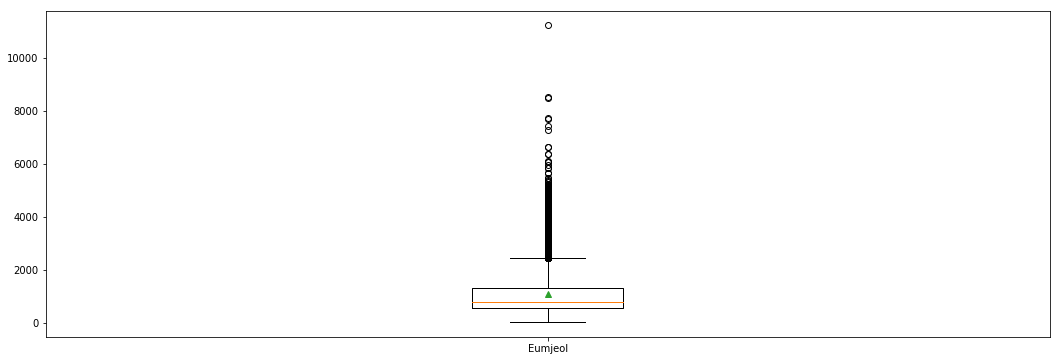

In [12]:
plt.figure(figsize = (18,6))

# 박스플롯 생성
# 첫번째 인자 : 여러 분포에 대한 데이터 리스트를 입력
# labels : 입력한 데이터에 대한 라벨
# showmeans : 평균값을 마크함
plt.boxplot([review_len_by_eumjeol], labels = ["Eumjeol"], showmeans=True)
plt.show()

## 워드 클라우드

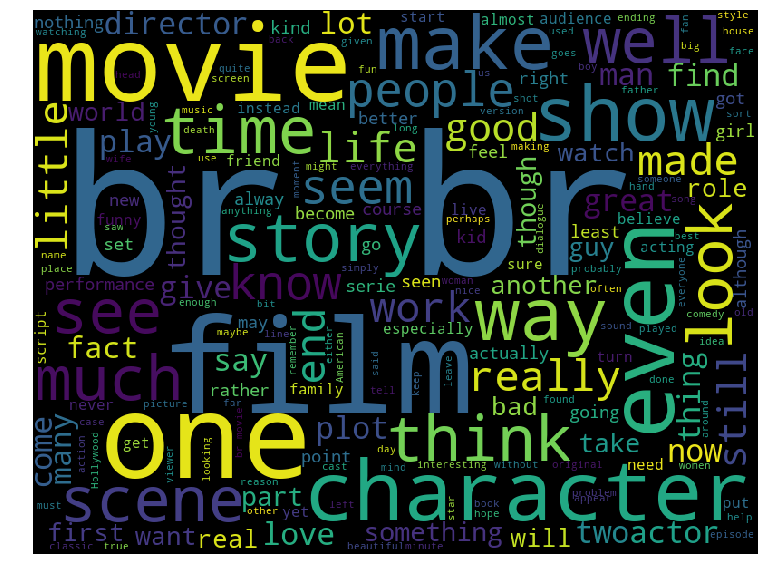

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "black", width = 800,
                      height = 600).generate("".join(train_df["review"]))

plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 긍정 부정의 분포

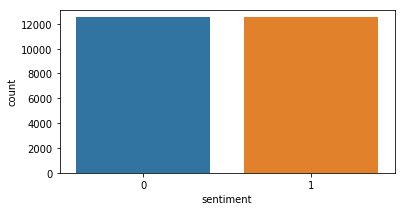

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df["sentiment"].value_counts()
fig, axe = plt.subplots(ncols = 1)
fig.set_size_inches(6,3)
sns.countplot(train_df["sentiment"])

긍정과 부정의 개수가 12,000개로 같다. 이것은 데이터의 균형이 아주 좋다는 것을 나타낸다. 하지만 모든 데이터가 이렇게 좋은 균형을 유지하는 것은 아니다. 균형이 좋지 않은 데이터를 어떻게 처리하는지도 매우 중요하다.